## Airbnb

In [1]:
import numpy as np
import pandas as pd

from dateutil import parser
from dateutil.relativedelta import relativedelta

from datetime import timedelta
from datetime import datetime

%matplotlib inline  
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,6]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10

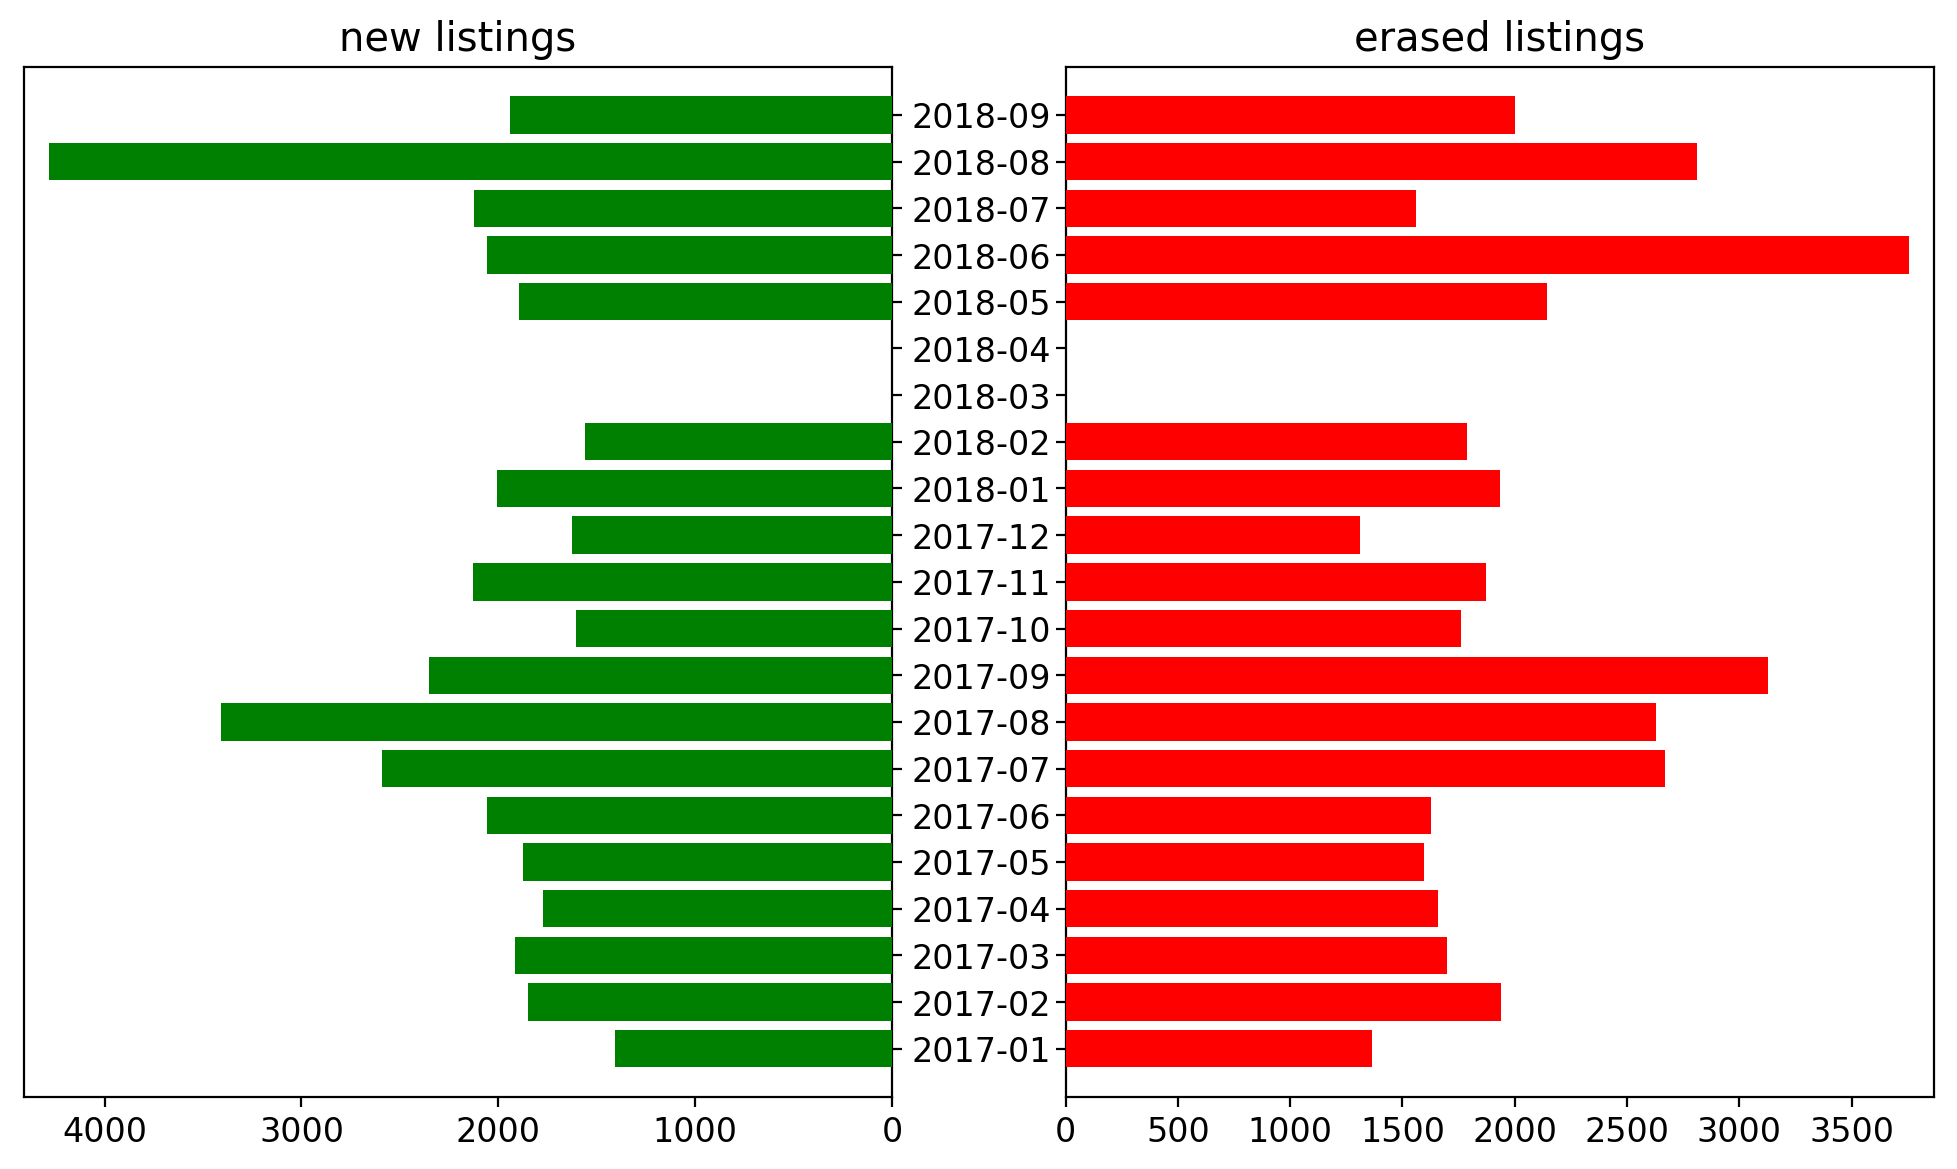

In [2]:
start_date = "2016-12-01"
stop_date = "2018-09-01"

start = datetime.strptime(start_date, "%Y-%m-%d")
stop = datetime.strptime(stop_date, "%Y-%m-%d")

path = 'data/'+start.strftime('%Y-%m')+'.csv'
df_airbnb = pd.read_csv(path, sep=',')
last_month_ids = df_airbnb.id.values


# Data
months = []
new_listings = []
erased_listings = []

while start < stop:
    start = start + relativedelta(months=+1)
    month = start.strftime('%Y-%m')
    path = 'data/'+month+'.csv'
    try:
        df_airbnb = pd.read_csv(path, sep=',')
    except:
        pass
    current_month_ids = df_airbnb.id.values
    intersect = np.intersect1d(last_month_ids, df_airbnb.id.values)
    months.append(month)
    if month != '2018-04':
        new_listings.append(len(current_month_ids) - len(intersect))
        erased_listings.append(len(last_month_ids) - len(intersect))
        print '\n'
    else:
        new_listings.append(0)
        erased_listings.append(0)
    last_month_ids = current_month_ids
    
new_listings = np.array(new_listings)
erased_listings = np.array(erased_listings)    
    
y = np.arange(erased_listings.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, new_listings, align='center', color='green', zorder=10)
axes[0].set(title='new listings')
axes[1].barh(y, erased_listings, align='center', color='red', zorder=10)
axes[1].set(title='erased listings')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=months)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(False)

fig.tight_layout()
fig.subplots_adjust(wspace=0.2)
plt.show()    

In [3]:
start_date = "2016-12-01"
stop_date = "2018-09-01"

start = datetime.strptime(start_date, "%Y-%m-%d")
stop = datetime.strptime(stop_date, "%Y-%m-%d")

path = 'data/'+start.strftime('%Y-%m')+'.csv'
df_last_month_airbnb = pd.read_csv(path, sep=',')
last_month_ids = df_last_month_airbnb.id.values

# Data
months = []
new_listings = []
erased_listings = []

while start < stop:
    start = start + relativedelta(months=+1)
    month = start.strftime('%Y-%m')
    if month != '2018-04' and month != '2018-03':
        path = 'data/'+month+'.csv'
        df_current_month_airbnb = pd.read_csv(path, sep=',')
        current_month_ids = df_current_month_airbnb.id.values
        intersect = np.intersect1d(last_month_ids, current_month_ids)
        df_last_month_airbnb[df_last_month_airbnb.id.isin(np.setdiff1d(last_month_ids,intersect))].to_csv('data/erased_listings_'+month+'.csv', sep=',', encoding='utf-8')
        df_current_month_airbnb[df_current_month_airbnb.id.isin(np.setdiff1d(current_month_ids,intersect))].to_csv('data/new_listings_'+month+'.csv', sep=',', encoding='utf-8')
        df_last_month_airbnb = pd.read_csv(path, sep=',')
        last_month_ids = df_last_month_airbnb.id.values